In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [6]:
url ="https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv"
social_data = pd.read_csv(url)
print(social_data.head(20))

     User ID  Gender  Age  EstimatedSalary  Purchased
0   15624510    Male   19            19000          0
1   15810944    Male   35            20000          0
2   15668575  Female   26            43000          0
3   15603246  Female   27            57000          0
4   15804002    Male   19            76000          0
5   15728773    Male   27            58000          0
6   15598044  Female   27            84000          0
7   15694829  Female   32           150000          1
8   15600575    Male   25            33000          0
9   15727311  Female   35            65000          0
10  15570769  Female   26            80000          0
11  15606274  Female   26            52000          0
12  15746139    Male   20            86000          0
13  15704987    Male   32            18000          0
14  15628972    Male   18            82000          0
15  15697686    Male   29            80000          0
16  15733883    Male   47            25000          1
17  15617482    Male   45   

In [15]:
x = social_data[["Age","EstimatedSalary"]]
y = social_data["Purchased"]

#imputing the mean to remove NaN values
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

In [16]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)


In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
model = LogisticRegression(random_state = 42)

In [19]:
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
TP, TN , FP ,FN = conf_matrix.ravel()

accuracy = accuracy_score(y_test , y_pred)
error_rate = 1-accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[50  2]
 [ 9 19]]

True Positive (TP): 50
False Positive (FP): 9
True Negative (TN): 2
False Negative (FN): 19

Accuracy: 0.8625
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
Recall: 0.6785714285714286
F1 Score: 0.7755102040816326


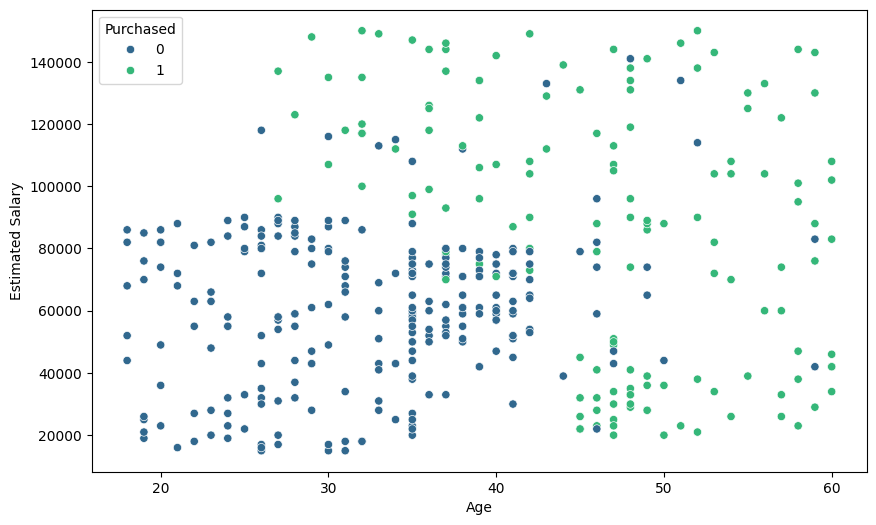

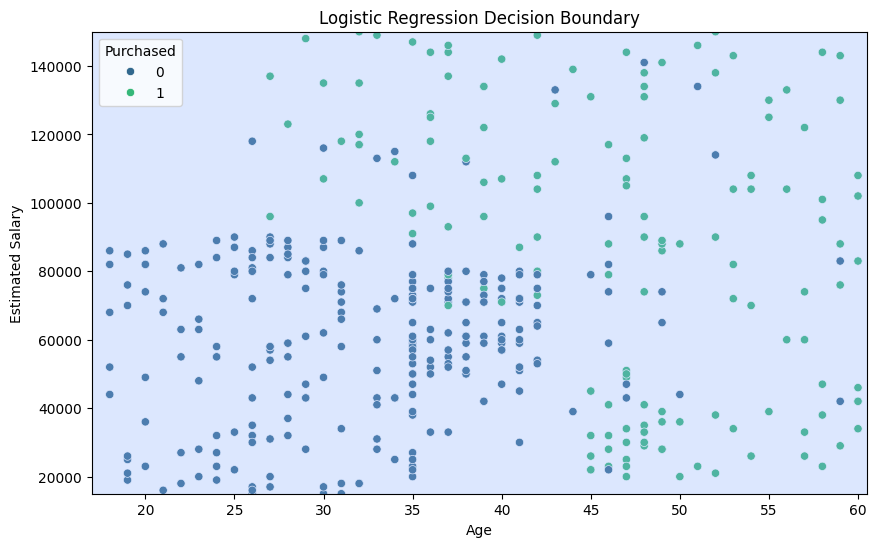

In [24]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=social_data, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Plot the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=social_data, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')


# Plotting decision boundary
h = 0.5
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.title('Logistic Regression Decision Boundary')
plt.show()